In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from scipy.spatial.distance import pdist

(150, 2)


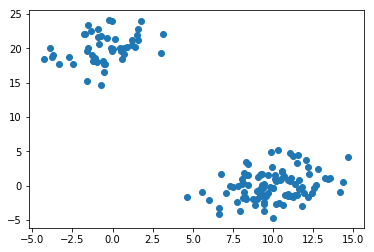

In [5]:
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print (X.shape)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [14]:
Z = linkage(X, "ward")
c, coph_dist = cophenet(Z,pdist(X))
c

0.9781131704289695

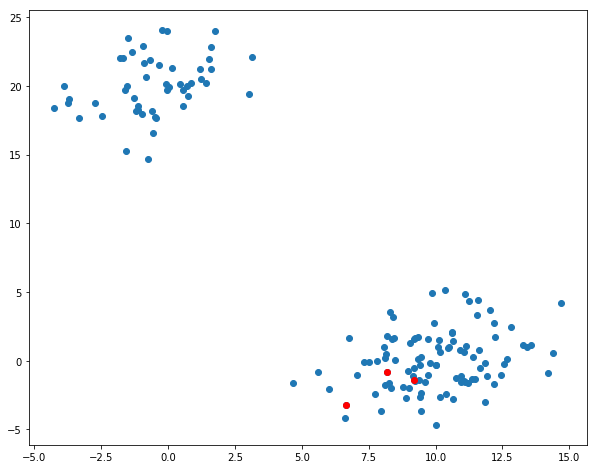

In [15]:
idx = [33,62,68]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[idx,0],X[idx,1],c="r")
plt.show()

## Graphic representation

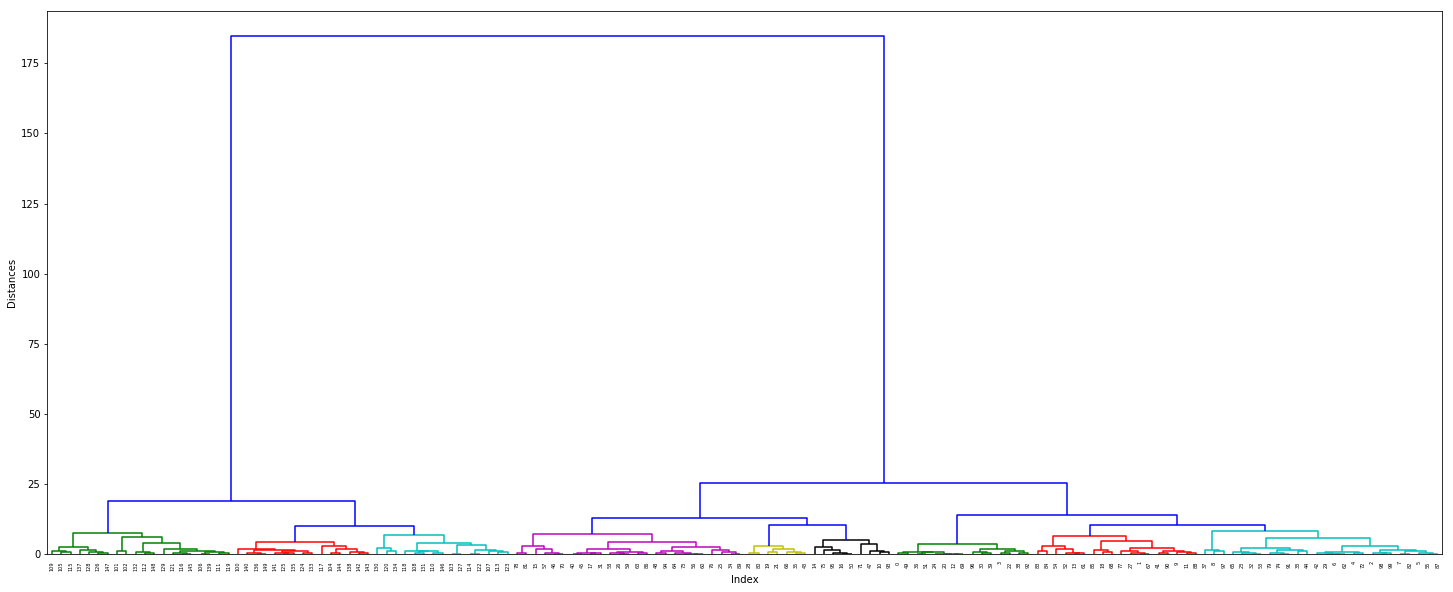

In [24]:
plt.figure(figsize=(25,10))
plt.xlabel("Index")
plt.ylabel("Distances")
dendrogram(Z,color_threshold=0.05*184)
plt.show()

In [20]:
Z[-4:,]

array([[276.        , 293.        ,  14.08889796,  59.        ],
       [289.        , 291.        ,  18.96548644,  50.        ],
       [294.        , 295.        ,  25.46063589, 100.        ],
       [296.        , 297.        , 184.5436805 , 150.        ]])

### Truncate the dendrogram

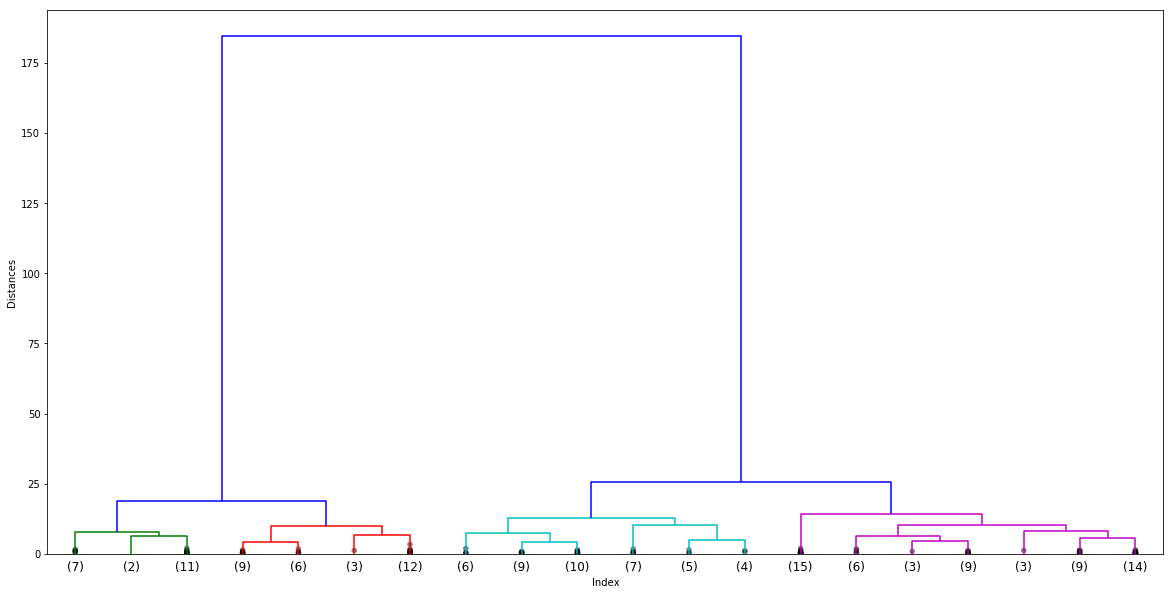

In [33]:
plt.figure(figsize=(20,10))
plt.xlabel("Index")
plt.ylabel("Distances")
dendrogram(Z,color_threshold=0.1*184,truncate_mode="lastp",p=20,show_contracted=True)
plt.show()

### Personzalizate dendrogram

In [40]:
def dendrogram_tune(*args,**kwargs):
    maxi_distance = kwargs.pop("maxi_distance",None)
    if maxi_distance and 'color_threshold' not in kwargs:
        kwargs["color_threshold"] = maxi_distance
    annotate_above = kwargs.pop("annotate_above", 0)
    ddata = dendrogram(*args,**kwargs)
    if not kwargs.get('no_plot',False):
        plt.title("Hierachical clustering with dendrogram")
        plt.xlabel("Index")
        plt.ylabel("Distances")
        for index_i,distances_i,color in zip(ddata['icoord'],ddata['dcoord'],ddata['color_list']):
            x = 0.5 * sum(index_i[1:3])
            y = distances_i[1]
            if y > annotate_above:
                plt.plot(x,y,'o',c=color)
                plt.annotate('%3.g'%y,(x,y),xytext=(0,-5),
                        textcoords="offset points",va="top",ha="center")
    if maxi_distance:
        plt.axhline(y=maxi_distance,c='k')
    return ddata

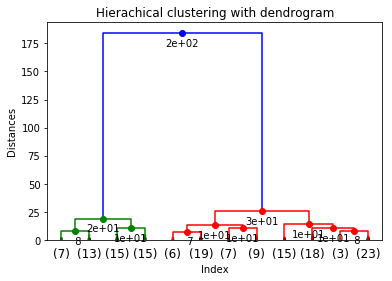

In [42]:
dendrogram_tune(Z,truncate_mode="lastp",p=12,show_contracted=True)
plt.show()

## Cut the dendrogram

In [43]:
from scipy.cluster.hierarchy import inconsistent

In [44]:
depth = 5
incons = inconsistent(Z,depth)
incons[-5:]

array([[ 2.84754414,  3.17996289, 24.        ,  3.16383903],
       [ 2.87373958,  3.4142567 , 27.        ,  3.28480234],
       [ 3.71044702,  4.06295967, 24.        ,  3.75466179],
       [ 4.79472816,  5.33330194, 31.        ,  3.8748805 ],
       [12.12960529, 32.47672449, 31.        ,  5.30885051]])

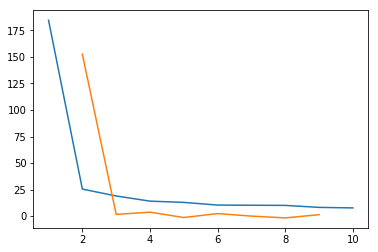

In [48]:
last = Z[-10:,2]
last_rev = last[::-1]
idx = np.arange(1,len(last)+1)
plt.plot(idx,last_rev)
acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1,acc_rev)
plt.show()
k = acc_rev.max() + 2